# **Challenge Telecom X: análisis de evasión de clientes**

## **Extracción**

### **Extraccion de datos**

In [182]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
df = response.json()



datos = pd.json_normalize(df, sep='_')

In [94]:
datos

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## **Transformación**

### **Comprobación de incoherencias en los datos**

In [95]:
datos.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [96]:
for col in datos.columns:
    print(f"Columna: {col}")
    print(datos[col].unique())
    print("-" * 30)

Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Columna: Churn
['No' 'Yes' '']
------------------------------
Columna: customer_gender
['Female' 'Male']
------------------------------
Columna: customer_SeniorCitizen
[0 1]
------------------------------
Columna: customer_Partner
['Yes' 'No']
------------------------------
Columna: customer_Dependents
['Yes' 'No']
------------------------------
Columna: customer_tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
------------------------------
Columna: phone_PhoneService
['Yes' 'No']
------------------------------
Columna: phone_MultipleLines
['No' 'Yes' 'No phone service']
------------------------------
Columna: internet_InternetService
['DSL' 'Fiber optic' 'No']
-----------

In [97]:
datos['Churn'][datos['Churn'] == ""].count()

np.int64(224)

In [98]:
datos['Churn'].count()

np.int64(7267)

In [99]:
porcentaje_vacios = ( (datos['Churn'][datos['Churn'] == ""].count()) / datos['Churn'].count() ) * 100 ## divide el numero de datos vacios con el total de datos y divide por 100 para obtener el porcentaje
print(f"{porcentaje_vacios:.2f}%")

3.08%


| Porcentaje de vacíos | Acción recomendada                                          |
| -------------------- | ----------------------------------------------------------- |
| 0% - 5%              | Puedes eliminar o imputar (rellenar)                        |
| 5% - 15%             | Se recomienda imputar                                       |
| >15%                 | Imputar con técnicas más sofisticadas o investigar la causa |


In [100]:
datos = datos[datos['Churn'] != ""]

In [101]:
datos['Churn'][datos['Churn'] == ""].count()

np.int64(0)

In [102]:
datos.columns = datos.columns.str.lower().str.replace(' ', '_')

In [118]:
datos['account_charges_total'][datos['account_charges_total'] == ' '].count()

np.int64(11)

In [120]:
porcentaje_vacios = ( (datos['account_charges_total'][datos['account_charges_total'] == ' '].count() ) / datos['account_charges_total'].count() ) * 100 ## divide el numero de datos vacios con el total de datos y divide por 100 para obtener el porcentaje
print(f"{porcentaje_vacios:.2f}%")

0.16%


In [121]:
datos = datos[datos['account_charges_total'] != ' ']

In [122]:
datos['account_charges_total'] = datos['account_charges_total'].astype(float)

/tmp/ipython-input-122-2376300785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['account_charges_total'] = datos['account_charges_total'].astype(float)


In [123]:
datos.sample(10)

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,Cuentas_Diarias
974,1370-GGAWX,False,Female,0,False,False,46,True,True,Fiber optic,False,True,True,False,False,True,One year,True,Electronic check,94.15,4408.45,3.14
2426,3391-JSQEW,False,Male,0,True,False,40,True,False,DSL,False,True,False,False,False,False,Month-to-month,True,Mailed check,50.15,2058.50,1.67
5330,7277-OZCGZ,False,Female,0,False,False,22,True,False,Fiber optic,True,False,False,True,False,True,Month-to-month,True,Electronic check,89.05,1886.25,2.97
5355,7314-OXENN,True,Male,0,False,False,2,True,True,Fiber optic,False,True,False,False,False,False,Month-to-month,True,Electronic check,82.00,184.65,2.73
3953,5396-IZEPB,False,Male,0,False,False,9,True,False,No,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,False,Credit card (automatic),19.70,180.70,0.66
3336,4640-UHDOS,True,Female,0,True,True,13,True,False,DSL,False,False,False,False,False,True,Month-to-month,False,Electronic check,55.95,734.35,1.86
2824,3914-FDRHP,False,Male,0,False,False,9,True,False,Fiber optic,False,False,False,True,True,False,Month-to-month,False,Electronic check,86.25,770.50,2.88
6876,9489-DEDVP,False,Female,0,True,True,70,True,True,DSL,True,True,False,False,True,False,Two year,True,Credit card (automatic),69.20,4872.35,2.31
2669,3716-BDVDB,True,Male,0,False,False,1,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,69.10,69.10,2.30
1106,1564-NTYXF,True,Female,1,False,False,13,True,True,Fiber optic,False,False,False,False,False,True,Month-to-month,True,Electronic check,82.00,1127.20,2.73


### **Columna de cuentas diarias**

In [104]:
datos['Cuentas_Diarias'] = (datos['account_charges_monthly'] / 30).round(2)

/tmp/ipython-input-104-9228045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Cuentas_Diarias'] = (datos['account_charges_monthly'] / 30).round(2)


In [105]:
datos

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


### **Estandarización y transformación de datos**

In [106]:
datos

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


In [107]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   object 
 5   customer_dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   object 
 8   phone_multiplelines        7043 non-null   object 
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   object 
 11  internet_onlinebackup      7043 non-null   object 
 12  internet_deviceprotection  7043 non-null   object 
 13  internet_techsupport       7043 non-null   object 
 1

In [108]:
columnas_a_transformar = ['churn', 'customer_partner', 'customer_dependents', 'phone_phoneservice', 'phone_multiplelines', 'internet_onlinesecurity', 'internet_onlinebackup',
                         'internet_deviceprotection', 'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies', 'account_paperlessbilling']

In [109]:
datos[columnas_a_transformar] = datos[columnas_a_transformar].apply(lambda col: col.str.strip().str.lower().map({"yes": True, "no": False}))

/tmp/ipython-input-109-258571157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos[columnas_a_transformar] = datos[columnas_a_transformar].apply(lambda col: col.str.strip().str.lower().map({"yes": True, "no": False}))


In [110]:
datos

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,Cuentas_Diarias
0,0002-ORFBO,False,Female,0,True,True,9,True,False,DSL,False,True,False,True,True,False,One year,True,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,False,Male,0,False,False,9,True,True,DSL,False,False,False,False,False,True,Month-to-month,False,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,True,Male,0,False,False,4,True,False,Fiber optic,False,False,True,False,False,False,Month-to-month,True,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,True,Male,1,True,False,13,True,False,Fiber optic,False,True,True,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,True,Female,1,True,False,3,True,False,Fiber optic,False,False,False,True,True,False,Month-to-month,True,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Female,0,False,False,13,True,False,DSL,True,False,False,True,False,False,One year,False,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,True,Male,0,True,False,22,True,True,Fiber optic,False,False,False,False,False,True,Month-to-month,True,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,False,Male,0,False,False,2,True,False,DSL,False,True,False,False,False,False,Month-to-month,True,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,False,Male,0,True,True,67,True,False,DSL,True,False,True,True,False,True,Two year,False,Mailed check,67.85,4627.65,2.26


In [111]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   bool   
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   bool   
 5   customer_dependents        7043 non-null   bool   
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   bool   
 8   phone_multiplelines        6361 non-null   object 
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    5517 non-null   object 
 11  internet_onlinebackup      5517 non-null   object 
 12  internet_deviceprotection  5517 non-null   object 
 13  internet_techsupport       5517 non-null   object 
 1

## **Carga y análisis**

### **Análisis Descriptivo**

In [125]:
datos

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,Cuentas_Diarias
0,0002-ORFBO,False,Female,0,True,True,9,True,False,DSL,False,True,False,True,True,False,One year,True,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,False,Male,0,False,False,9,True,True,DSL,False,False,False,False,False,True,Month-to-month,False,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,True,Male,0,False,False,4,True,False,Fiber optic,False,False,True,False,False,False,Month-to-month,True,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,True,Male,1,True,False,13,True,False,Fiber optic,False,True,True,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,True,Female,1,True,False,3,True,False,Fiber optic,False,False,False,True,True,False,Month-to-month,True,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Female,0,False,False,13,True,False,DSL,True,False,False,True,False,False,One year,False,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,True,Male,0,True,False,22,True,True,Fiber optic,False,False,False,False,False,True,Month-to-month,True,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,False,Male,0,False,False,2,True,False,DSL,False,True,False,False,False,False,Month-to-month,True,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,False,Male,0,True,True,67,True,False,DSL,True,False,True,True,False,True,Two year,False,Mailed check,67.85,4627.65,2.26


In [124]:
datos.describe()

,customer_seniorcitizen,customer_tenure,account_charges_monthly,account_charges_total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159891
std,0.368844,24.545260,30.085974,2266.771362,1.002955
min,0.000000,1.000000,18.250000,18.800000,0.610000
25%,0.000000,9.000000,35.587500,401.450000,1.187500
50%,0.000000,29.000000,70.350000,1397.475000,2.340000
75%,0.000000,55.000000,89.862500,3794.737500,2.992500
max,1.000000,72.000000,118.750000,8684.800000,3.960000


### **Distribución de evasión**

In [245]:
datos

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,Cuentas_Diarias
0,0002-ORFBO,False,Female,0,True,True,9,True,False,DSL,False,True,False,True,True,False,One year,True,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,False,Male,0,False,False,9,True,True,DSL,False,False,False,False,False,True,Month-to-month,False,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,True,Male,0,False,False,4,True,False,Fiber optic,False,False,True,False,False,False,Month-to-month,True,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,True,Male,1,True,False,13,True,False,Fiber optic,False,True,True,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,True,Female,1,True,False,3,True,False,Fiber optic,False,False,False,True,True,False,Month-to-month,True,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Female,0,False,False,13,True,False,DSL,True,False,False,True,False,False,One year,False,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,True,Male,0,True,False,22,True,True,Fiber optic,False,False,False,False,False,True,Month-to-month,True,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,False,Male,0,False,False,2,True,False,DSL,False,True,False,False,False,False,Month-to-month,True,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,False,Male,0,True,True,67,True,False,DSL,True,False,True,True,False,True,Two year,False,Mailed check,67.85,4627.65,2.26


In [167]:
colores = ['slateblue',        # Azul púrpura elegante
           'seagreen']         # Verde mar profundo

In [132]:
conteo = datos['churn'].value_counts()

In [142]:
conteo

,count
churn,
False,5163
True,1869


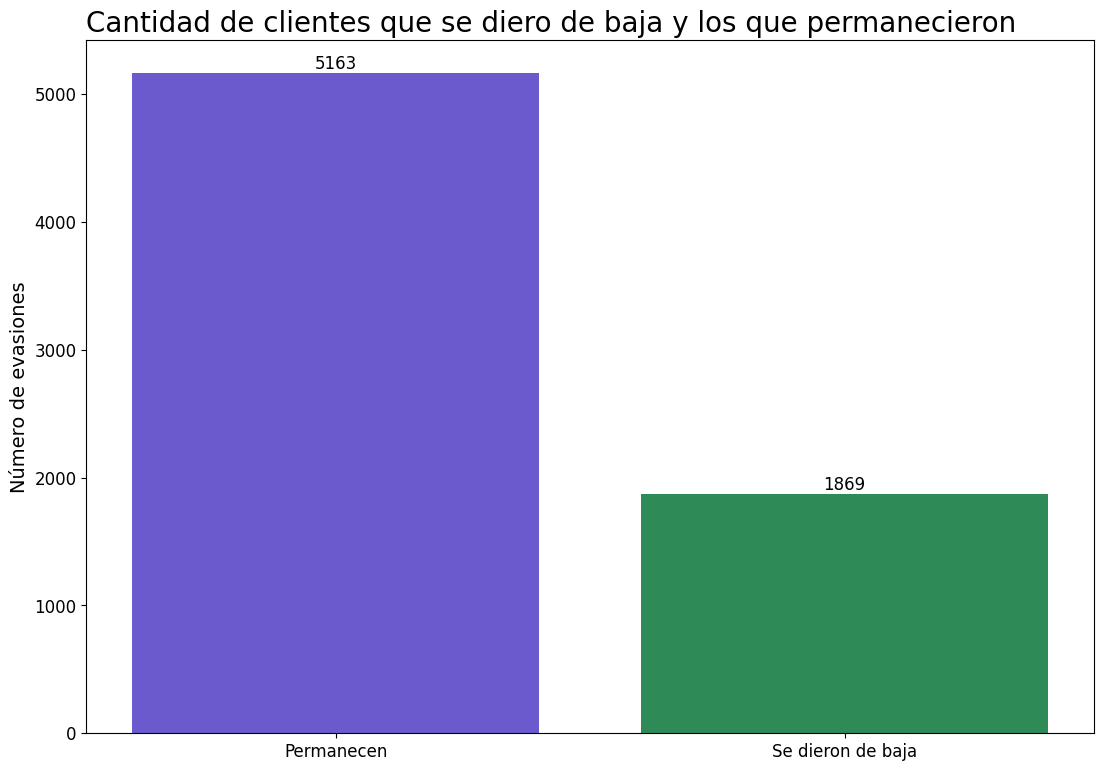

In [179]:
plt.style.use('default')  # Tema

# Contar los valores True y False en la columna 'Churn'
conteo = datos['churn'].value_counts()

# Etiquetas personalizadas
etiquetas = ['Permanecen', 'Se dieron de baja']  # False primero, luego True
valores = conteo.get(False, 0), conteo.get(True, 0) # Asegurarse del orden

fig, ax = plt.subplots(figsize=(13,9))
ax.bar(etiquetas, valores, color=colores)


ax.set_title('Cantidad de clientes que se diero de baja y los que permanecieron', loc='left', fontsize=20)

ax.set_xlabel('')
ax.set_ylabel('Número de evasiones', fontsize=14)

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# Valores encima de las barras
for i, valor in enumerate(valores):
    ax.text(i, valor + 5, str(valor), ha='center', va='bottom', fontsize=12)

plt.show()

### **Conteo de evasión por variables numéricas**

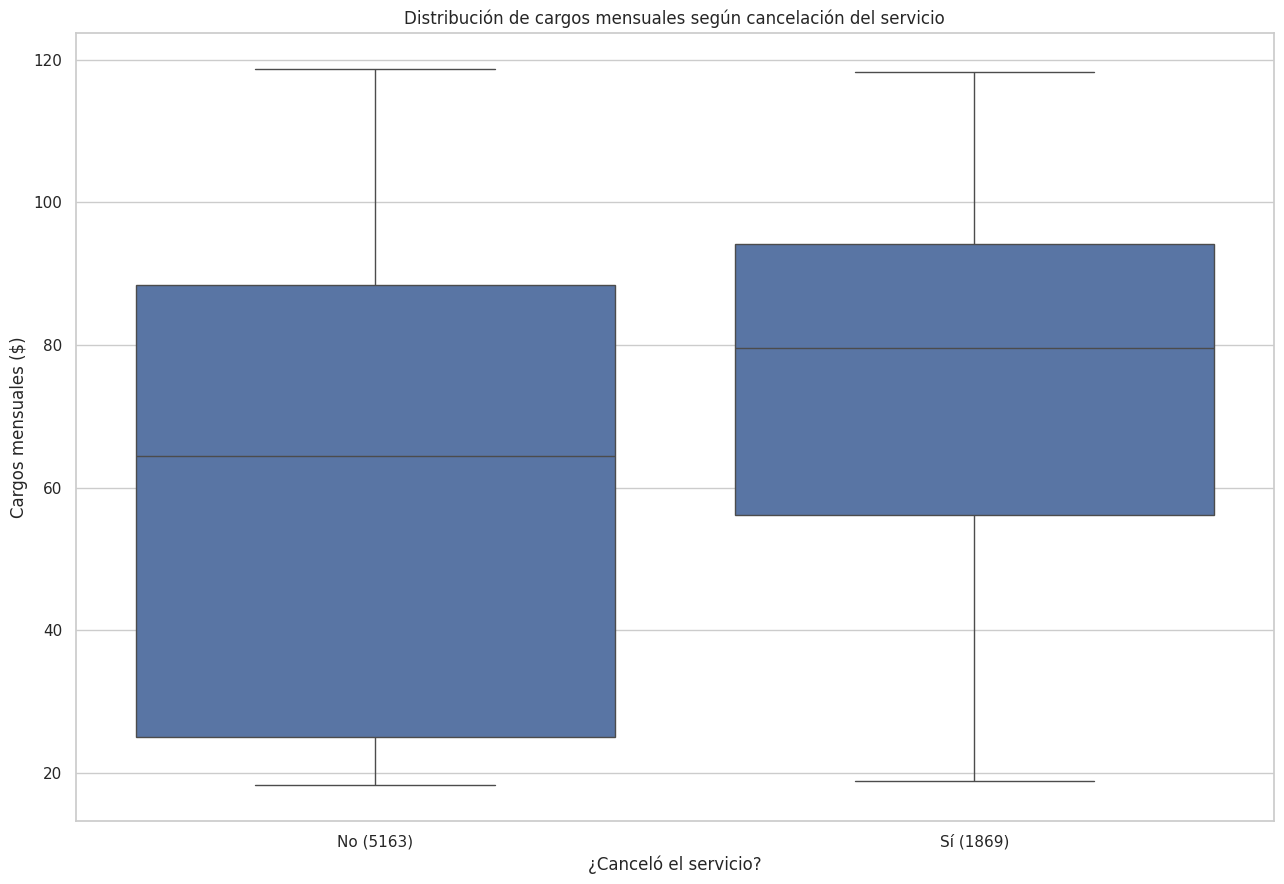

In [234]:
plt.figure(figsize=(13,9))
sns.set_style("whitegrid")

conteo = datos['churn'].value_counts()
etiquetas = [f"No ({conteo[False]})", f"Sí ({conteo[True]})"]

sns.boxplot(data=datos, x='churn', y='account_charges_monthly')

plt.title('Distribución de cargos mensuales según cancelación del servicio')
plt.xlabel('¿Canceló el servicio?')
plt.ylabel('Cargos mensuales ($)')
plt.xticks([0, 1], etiquetas)
plt.tight_layout()

plt.show()

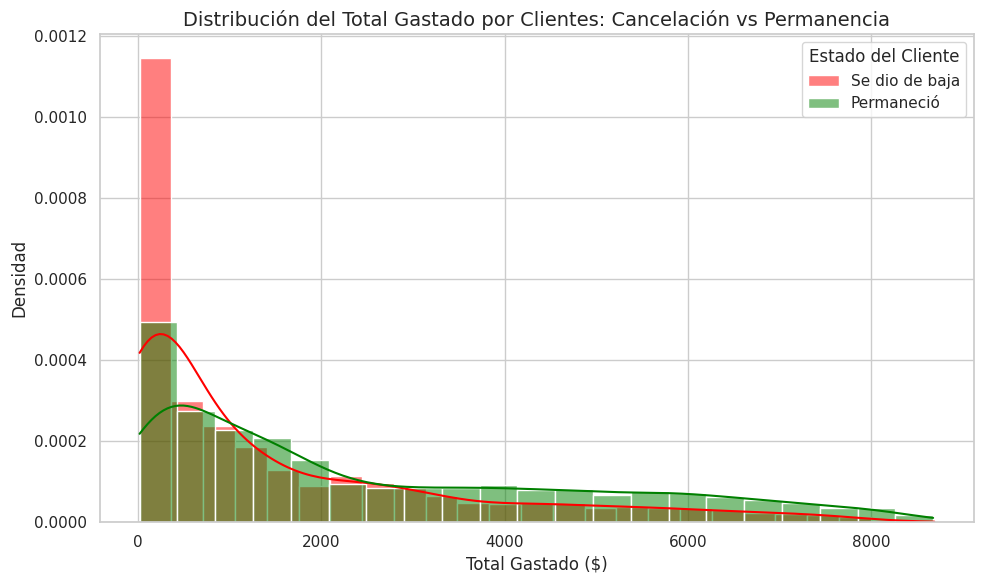

In [242]:
# Estilo
sns.set_style("whitegrid")

# Tamaño del gráfico
plt.figure(figsize=(10,6))

# Histograma de Churn = True (se dio de baja)
sns.histplot(
    datos[datos['churn'] == True]['account_charges_total'],
    color='red',
    label='Se dio de baja',
    kde=True,
    stat='density',
    alpha=0.5,
    common_norm=False
)

# Histograma de Churn = False (permaneció)
sns.histplot(
    datos[datos['churn'] == False]['account_charges_total'],
    color='green',
    label='Permaneció',
    kde=True,
    stat='density',
    alpha=0.5,
    common_norm=False
)

# Títulos y leyendas
plt.title("Distribución del Total Gastado por Clientes: Cancelación vs Permanencia", fontsize=14)
plt.xlabel("Total Gastado ($)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Estado del Cliente")
plt.tight_layout()
plt.show()


In [235]:
datos.groupby('churn')['account_charges_monthly'].describe()


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
False,5163.0,61.307408,31.094557,18.25,25.10,64.45,88.475,118.75
True,1869.0,74.441332,24.666053,18.85,56.15,79.65,94.200,118.35


In [244]:
datos.groupby('churn')[['account_charges_monthly', 'account_charges_total', 'customer_tenure']].describe()

account_charges_monthly                                             \
                        count       mean        std    min    25%    50%   
churn                                                                      
False                  5163.0  61.307408  31.094557  18.25  25.10  64.45   
True                   1869.0  74.441332  24.666053  18.85  56.15  79.65   

                      account_charges_total                                   \
          75%     max                 count         mean          std    min   
churn                                                                          
False  88.475  118.75                5163.0  2555.344141  2329.456984  18.80   
True   94.200  118.35                1869.0  1531.796094  1890.822994  18.85   

                                           customer_tenure             \
           25%      50%       75%      max           count       mean   
churn                                                                   
False  577.825  1683.60  4264.125  8672.45          5163.0  37.650010   
True   134.500   703.55  2331.300  8684.80          1869.0  17.979133   

                                               
             std  min   25%   50%   75%   max  
churn                                          
False  24.076940  1.0  15.0  38.0  61.0  72.0  
True   19.531123  1.0   2.0  10.0  29.0  72.0

### **Informe Final - Análisis de Evasión de Clientes en Telecom X**

#### **Introduccion**

En este análisis trabajamos con datos proporcionados por la empresa ficticia Telecom X, que atraviesa una preocupante tasa de churn o evasión de clientes. El objetivo del proyecto fue entender los factores que influyen en la cancelación de servicios por parte de los clientes, y así ofrecer información valiosa para que el equipo de Data Science pueda diseñar modelos predictivos y estrategias que permitan reducir dicha evasión.

El churn se define aquí como la cancelación de servicios por parte de un cliente, y fue representado en la variable churn. Analizar este fenómeno resulta fundamental para la sostenibilidad del negocio, ya que retener clientes suele ser mucho más económico que adquirir nuevos.

#### **Limpieza y Tratamiento de Datos**

Los datos fueron obtenidos desde una API proporcionada por el desafío, en formato JSON, y cargados mediante las librerías requests y pandas. La estructura se normalizó para facilitar el análisis.

Posteriormente se realizaron las siguientes tareas de limpieza:

- Conversión de columnas categóricas binarias (Yes/No) a valores booleanos (True/False).

- Conversión de columnas numéricas (como cargos mensuales y totales) a tipo float.

- Conversión de columnas de duración (como customer_tenure) a tipo int.

- Eliminación de filas con valores faltantes, ya que representaban menos del 5% del total de registros.

- Verificación de unicidad de valores y consistencia de los tipos de datos.

#### **Análisis Exploratorio de Datos (EDA)**

Se realizó un análisis exploratorio utilizando gráficos como boxplots, barras e histogramas con las librerías matplotlib y seaborn.

Se analizaron en detalle las siguientes variables:

- churn (si el cliente canceló o no)

- account_charges_monthly (cargos mensuales)

- account_charges_total (gasto total)

- customer_tenure (tiempo como cliente)

#### **Hallazgos Clave**

Distribución de clientes según churn:

- La mayoría de los clientes no se dio de baja.

- Aún así, un número importante sí canceló el servicio, lo que justifica el análisis.

Cargos mensuales (account_charges_monthly):

- Clientes que se dieron de baja tienen una media de 74.44, mientras que los que se quedaron promedian 61.30.

- Indica que los clientes con cargos mensuales más altos tienden a cancelar más.

Cargos totales (account_charges_total):

- Contrario a lo esperado, los clientes que permanecen tienen un gasto acumulado mayor.

- Esto sugiere que los clientes más antiguos (con mayor fidelización) se mantienen, mientras que los más nuevos se retiran temprano.

Antigüedad (customer_tenure):

- Los clientes que se fueron tenían una media de 17.9 meses, mientras que los que se quedaron alcanzan 37.6 meses.

- La fidelidad aumenta con el tiempo: los clientes más recientes son más propensos al churn.

#### **Conclusiones e Insights**

El análisis sugiere que el problema de evasión en Telecom X está relacionado principalmente con:

- Altos cargos mensuales: clientes que pagan más tienden a irse antes.

- Poca antigüedad: los nuevos clientes son más vulnerables a cancelar su servicio.

- Falta de fidelización inicial: los primeros meses parecen ser críticos para retener a los usuarios.

En cambio, los clientes con más antigüedad y mayor gasto total demuestran mayor estabilidad y menor probabilidad de churn.

#### **Recomendaciones**

Basado en los hallazgos, se proponen las siguientes estrategias:

- Ofrecer descuentos o beneficios personalizados a los clientes con cargos mensuales elevados durante sus primeros meses.

- Implementar programas de fidelización temprana que recompensen la permanencia continua del cliente.

- Analizar causas de cancelación directamente desde encuestas, enfocándose especialmente en los clientes recientes.

- Revisar la política de precios, para asegurar que los cargos mensuales percibidos como altos correspondan a una buena experiencia de servicio.

### **Recuento de evasión por variables categóricas**

In [250]:
datos

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,Cuentas_Diarias
0,0002-ORFBO,False,Female,0,True,True,9,True,False,DSL,False,True,False,True,True,False,One year,True,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,False,Male,0,False,False,9,True,True,DSL,False,False,False,False,False,True,Month-to-month,False,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,True,Male,0,False,False,4,True,False,Fiber optic,False,False,True,False,False,False,Month-to-month,True,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,True,Male,1,True,False,13,True,False,Fiber optic,False,True,True,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,True,Female,1,True,False,3,True,False,Fiber optic,False,False,False,True,True,False,Month-to-month,True,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Female,0,False,False,13,True,False,DSL,True,False,False,True,False,False,One year,False,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,True,Male,0,True,False,22,True,True,Fiber optic,False,False,False,False,False,True,Month-to-month,True,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,False,Male,0,False,False,2,True,False,DSL,False,True,False,False,False,False,Month-to-month,True,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,False,Male,0,True,True,67,True,False,DSL,True,False,True,True,False,True,Two year,False,Mailed check,67.85,4627.65,2.26


In [248]:
categorical_cols = datos.select_dtypes(include='object').columns
categorical_cols

Index(['customerid', 'customer_gender', 'phone_multiplelines',
       'internet_internetservice', 'internet_onlinesecurity',
       'internet_onlinebackup', 'internet_deviceprotection',
       'internet_techsupport', 'internet_streamingtv',
       'internet_streamingmovies', 'account_contract',
       'account_paymentmethod'],
      dtype='object')

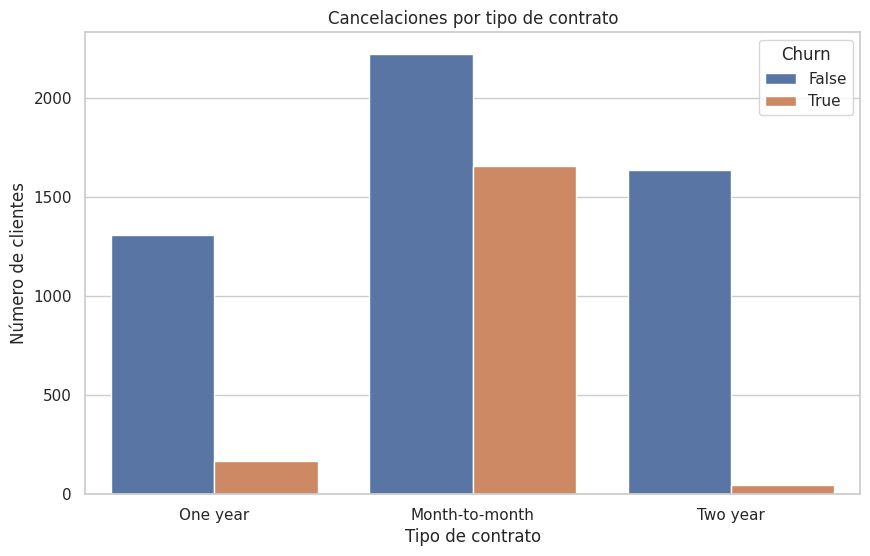

In [257]:
plt.figure(figsize=(10,6))
sns.countplot(data=datos, x='account_contract', hue='churn')
plt.title('Cancelaciones por tipo de contrato')
plt.ylabel('Número de clientes')
plt.xlabel('Tipo de contrato')
plt.legend(title='Churn')

plt.show()

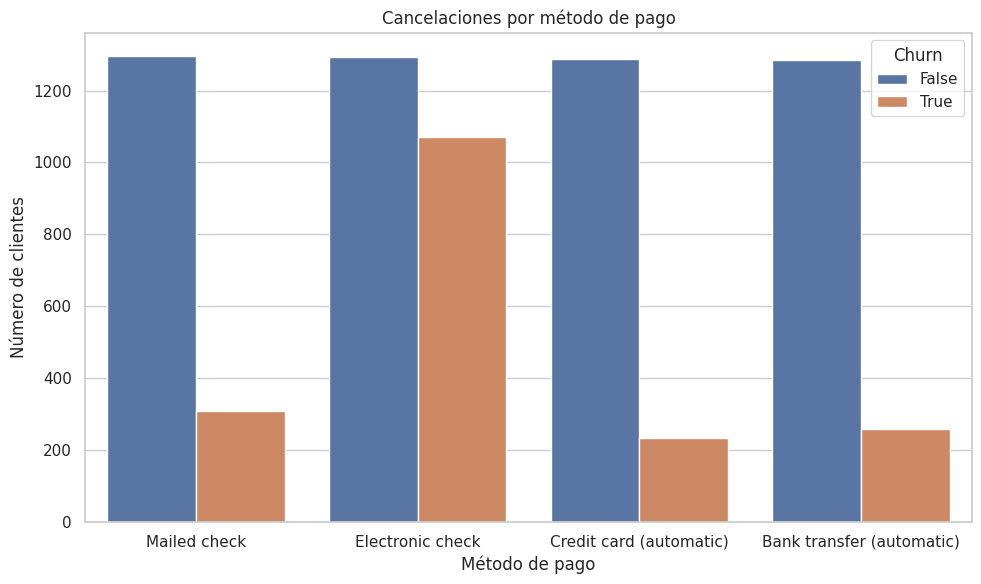

In [256]:
plt.figure(figsize=(10,6))
sns.countplot(data=datos, x='account_paymentmethod', hue='churn')
plt.title('Cancelaciones por método de pago')
plt.ylabel('Número de clientes')
plt.xlabel('Método de pago')
plt.legend(title='Churn')
plt.tight_layout()

plt.show()

In [262]:
contract_churn = datos.groupby(['account_contract', 'churn']).size().unstack().fillna(0)
contract_churn['churn_rate'] = contract_churn[True] / (contract_churn[True] + contract_churn[False])

In [263]:
contract_churn

churn,False,True,churn_rate
account_contract,,,
Month-to-month,2220,1655,0.427097
One year,1306,166,0.112772
Two year,1637,48,0.028487


#### **Análisis y conclusiones**

Se analizaron variables como account_contract y account_paymentmethod para identificar perfiles de mayor riesgo. Se encontró que:

- Clientes con contrato mensual tienen una tasa de evasión más alta que aquellos con contratos a un año o dos años.

- El método de pago 'electronic_check' se asocia con mayores niveles de cancelación.

### **Extra**

In [264]:
datos

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,Cuentas_Diarias
0,0002-ORFBO,False,Female,0,True,True,9,True,False,DSL,False,True,False,True,True,False,One year,True,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,False,Male,0,False,False,9,True,True,DSL,False,False,False,False,False,True,Month-to-month,False,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,True,Male,0,False,False,4,True,False,Fiber optic,False,False,True,False,False,False,Month-to-month,True,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,True,Male,1,True,False,13,True,False,Fiber optic,False,True,True,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,True,Female,1,True,False,3,True,False,Fiber optic,False,False,False,True,True,False,Month-to-month,True,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Female,0,False,False,13,True,False,DSL,True,False,False,True,False,False,One year,False,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,True,Male,0,True,False,22,True,True,Fiber optic,False,False,False,False,False,True,Month-to-month,True,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,False,Male,0,False,False,2,True,False,DSL,False,True,False,False,False,False,Month-to-month,True,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,False,Male,0,True,True,67,True,False,DSL,True,False,True,True,False,True,Two year,False,Mailed check,67.85,4627.65,2.26


In [265]:
datos['churn'] = datos['churn'].astype(int)

/tmp/ipython-input-265-295680615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['churn'] = datos['churn'].astype(int)


In [267]:
datos['churn']

,churn
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


In [268]:
numeric_df = datos.select_dtypes(include=['int64', 'float64'])

In [269]:
numeric_df

,churn,customer_seniorcitizen,customer_tenure,account_charges_monthly,account_charges_total,Cuentas_Diarias
0,0,0,9,65.60,593.30,2.19
1,0,0,9,59.90,542.40,2.00
2,1,0,4,73.90,280.85,2.46
3,1,1,13,98.00,1237.85,3.27
4,1,1,3,83.90,267.40,2.80
...,...,...,...,...,...,...
7262,0,0,13,55.15,742.90,1.84
7263,1,0,22,85.10,1873.70,2.84
7264,0,0,2,50.30,92.75,1.68
7265,0,0,67,67.85,4627.65,2.26


In [270]:
correlation_matrix = numeric_df.corr()

In [271]:
correlation_matrix

,churn,customer_seniorcitizen,customer_tenure,account_charges_monthly,account_charges_total,Cuentas_Diarias
churn,1.000000,0.150541,-0.354049,0.192858,-0.199484,0.192914
customer_seniorcitizen,0.150541,1.000000,0.015683,0.219874,0.102411,0.219848
customer_tenure,-0.354049,0.015683,1.000000,0.246862,0.825880,0.246874
account_charges_monthly,0.192858,0.219874,0.246862,1.000000,0.651065,0.999996
account_charges_total,-0.199484,0.102411,0.825880,0.651065,1.000000,0.651080
Cuentas_Diarias,0.192914,0.219848,0.246874,0.999996,0.651080,1.000000


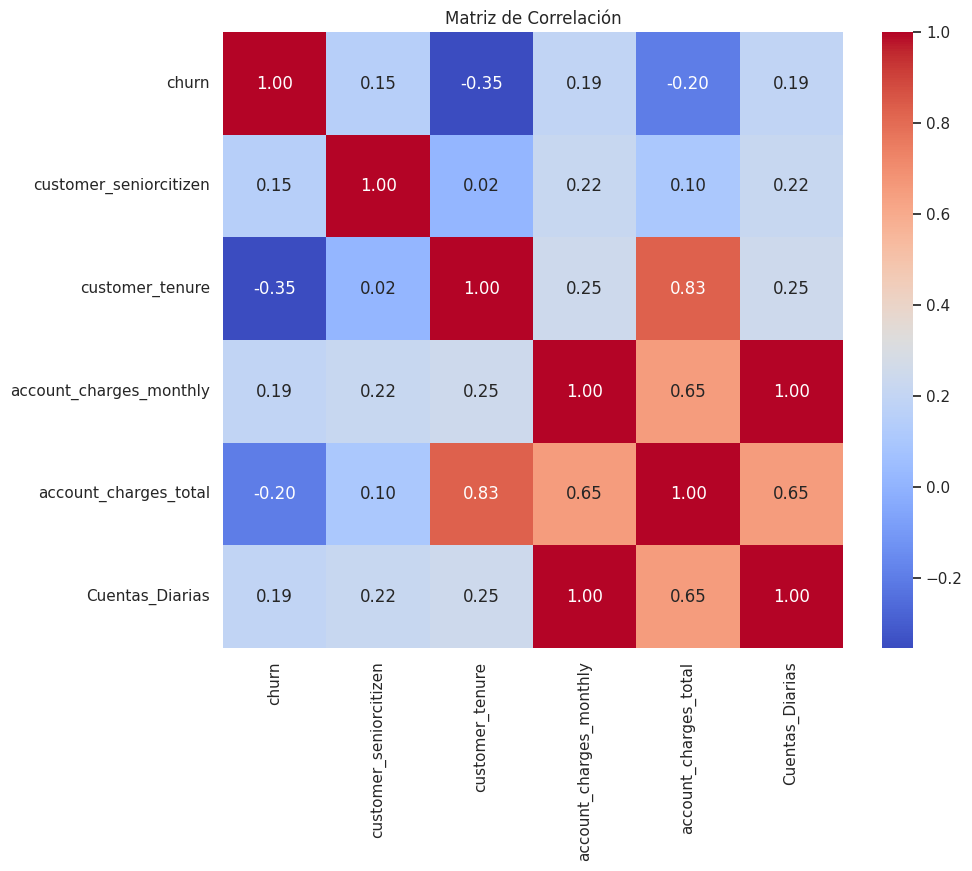

In [272]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [273]:
correlation_churn = correlation_matrix['churn'].sort_values(ascending=False)

In [274]:
correlation_churn

,churn
churn,1.000000
Cuentas_Diarias,0.192914
account_charges_monthly,0.192858
customer_seniorcitizen,0.150541
account_charges_total,-0.199484
customer_tenure,-0.354049


In [276]:
datos

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,True,True,9,True,False,DSL,False,True,False,True,True,False,One year,True,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,0,False,False,9,True,True,DSL,False,False,False,False,False,True,Month-to-month,False,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,0,False,False,4,True,False,Fiber optic,False,False,True,False,False,False,Month-to-month,True,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,1,True,False,13,True,False,Fiber optic,False,True,True,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,1,True,False,3,True,False,Fiber optic,False,False,False,True,True,False,Month-to-month,True,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,False,False,13,True,False,DSL,True,False,False,True,False,False,One year,False,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1,Male,0,True,False,22,True,True,Fiber optic,False,False,False,False,False,True,Month-to-month,True,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0,Male,0,False,False,2,True,False,DSL,False,True,False,False,False,False,Month-to-month,True,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,0,True,True,67,True,False,DSL,True,False,True,True,False,True,Two year,False,Mailed check,67.85,4627.65,2.26


In [278]:
# Sumar columnas booleanas relacionadas con servicios
servicios = ['phone_phoneservice', 'phone_multiplelines', 'internet_onlinesecurity', 'internet_onlinebackup', 'internet_deviceprotection',
             'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies']

In [279]:
datos = datos.dropna(subset=servicios)

In [280]:
datos[servicios] = datos[servicios].astype(int)  # Convertir a 0/1
datos['total_services'] = datos[servicios].sum(axis=1)

/tmp/ipython-input-280-1655112042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos[servicios] = datos[servicios].astype(int)  # Convertir a 0/1
/tmp/ipython-input-280-1655112042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['total_services'] = datos[servicios].sum(axis=1)


In [281]:
datos[['total_services', 'churn']].corr()

,total_services,churn
total_services,1.000000,-0.265277
churn,-0.265277,1.000000


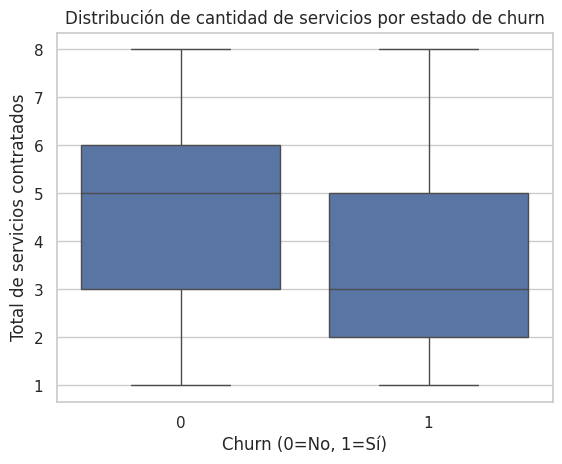

In [282]:
sns.boxplot(data=datos, x='churn', y='total_services')
plt.title('Distribución de cantidad de servicios por estado de churn')
plt.xlabel('Churn (0=No, 1=Sí)')
plt.ylabel('Total de servicios contratados')
plt.show()